In [209]:
# colab立ち上げ時実行
# module読み込み
import sys
sys.path.append('/content/drive/MyDrive/デリバティブ取引のすべて第二版/Derivatives/modules')

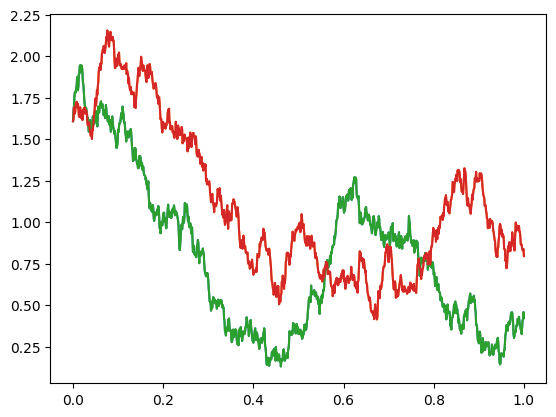

In [218]:
import matplotlib.pyplot as plt
import numpy as np

def brown_motion_path(x0, mu, sigma, T, dt, path_num, seed_Flag = False, seed = 0):
  if seed_Flag:
    np.random.seed(seed)
  N = int(T / dt)
  t = np.arange(0.0, T + dt, dt)
  dS = np.zeros([path_num, t.shape[0]])
  dS[:,0] = x0
  for i in range(t.shape[0]-1):
    dS[:,i+1] = dS[:,i] + mu * dt + sigma * np.sqrt(dt) * np.random.randn(path_num)
  return t, dS

def geometric_brown_motion_path(x0, mu, sigma, T, dt, path_num, seed_Flag = False, seed = 0):
  t, dW = brown_motion_path(0.0,0.0,1.0,T,dt,path_num,seed_Flag,seed)
  t_repeat = np.stack([t for _ in range(path_num)], axis = 0)
  trend = (mu - 0.5 * sigma**2) * t_repeat
  nonsense = sigma * dW
  dS = x0 * np.exp(trend + nonsense)
  return t, dS

t,S = brown_motion_path(np.log(5),0-0.5,1.0,1.0,0.001,2,True)
for Si in S:
  plt.plot(t,Si)

t,S = geometric_brown_motion_path(5,0,1.0,1.0,0.001,2,True)
for Si in S:
  plt.plot(t,np.log(Si))
plt.show()

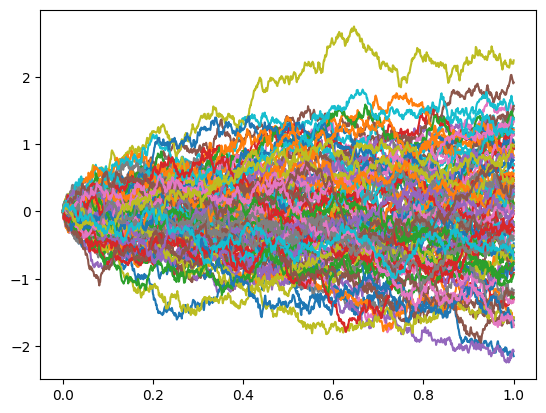

In [219]:
t,S = brown_motion_path(0,0,1.0,1.0,0.001,100,True)
for Si in S:
  plt.plot(t,Si)

In [176]:
import pandas_datareader.data as web
import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd

# 開始・終了日の設定
start = datetime.date.today() - relativedelta(ys=365)
end = datetime.date.today()

df = web.DataReader(['^TPX'], 'stooq', start, end)['Close']

# カラム名変更
df.rename(columns={
    '^TPX':'TOPIX'
},inplace=True)

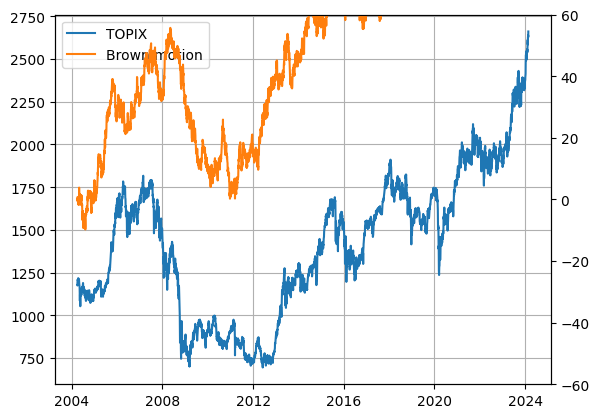

In [177]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ln1=ax1.plot(df,'C0',label=r'TOPIX')

ax2 = ax1.twinx()
T = df.shape[0]
t,S = brown_motion_path(0,0,1.0,T-1.0,1.0,1)
ln2=ax2.plot(df.index,S[0][::-1],'C1',label=r'Brown motion')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left')

ax1.grid(True)
ax2.set_ylim(-60,60)

plt.show()

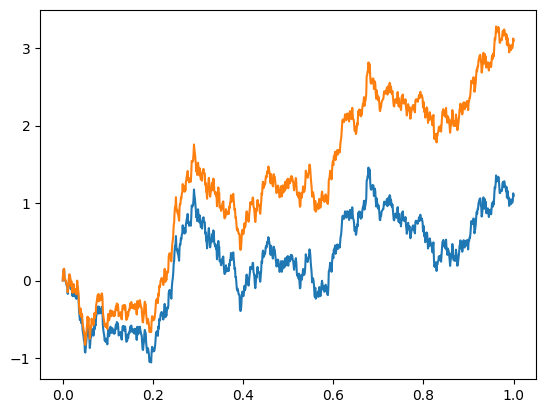

In [196]:
mu0 = 0.0
mu1 = 2.0
sigma = 2.0
t,S0 = brown_motion_path(0,mu0,sigma,1.0,0.001,1,True,3)
plt.plot(t,S0[0])
t,S1 = brown_motion_path(0,mu1,sigma,1.0,0.001,1,True,3)
plt.plot(t,S1[0])
plt.show()

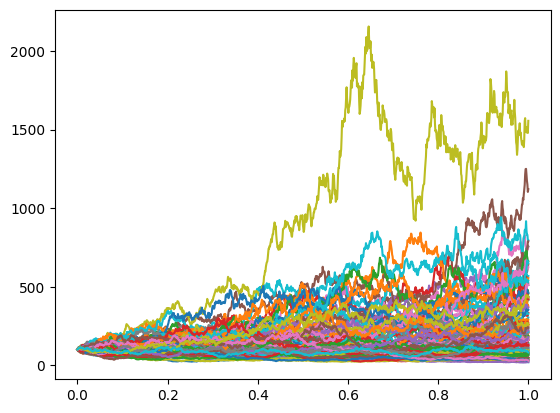

In [225]:
t,S = geometric_brown_motion_path(100,1.0,1.0,1.0,0.001,100,True)
for Si in S:
  plt.plot(t,Si)
plt.show()